IMPORTING DEPENDENCIES

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

IMPORTING THE DATASET

In [69]:
df = pd.read_csv(r"C:\Users\Shireen\Dropbox\PC\Documents\Indian Fashion Analytics\data\myntra_fashion.csv")

EXPLORING THE DATASET

In [70]:
df.shape

(12491, 8)

In [71]:
df.head()

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White


In [72]:
df.tail()

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
12486,10262843,Pepe Jeans Men Black Hammock Slim Fit Low-Rise...,Pepe Jeans,Men,1299,7,"Black dark wash 5-pocket low-rise jeans, clean...",Black
12487,10261721,Mochi Women Gold-Toned Solid Heels,Mochi,Women,1990,5,"A pair of gold-toned open toe heels, has regul...",Gold
12488,10261607,612 league Girls Navy Blue & White Printed Reg...,612 league,Girls,602,4,Navy Blue and White printed mid-rise denim sho...,Blue
12489,10266621,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,Bvlgari,Men,8950,2,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,NaN
12490,10265199,Pepe Jeans Men Black & Grey Striped Polo Colla...,Pepe Jeans,Men,799,5,"Black and grey striped T-shirt, has a polo col...",Black


In [73]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     12491 non-null  int64 
 1   ProductName   12491 non-null  object
 2   ProductBrand  12491 non-null  object
 3   Gender        12491 non-null  object
 4   Price (INR)   12491 non-null  int64 
 5   NumImages     12491 non-null  int64 
 6   Description   12491 non-null  object
 7   PrimaryColor  11597 non-null  object
dtypes: int64(3), object(5)
memory usage: 780.8+ KB


,ProductID,Price (INR),NumImages
count,1.249100e+04,12491.000000,12491.000000
mean,9.917160e+06,1452.660956,4.913698
std,1.438006e+06,2118.503976,1.092333
min,1.012060e+05,90.000000,1.000000
25%,1.006215e+07,649.000000,5.000000
50%,1.015463e+07,920.000000,5.000000
75%,1.021565e+07,1499.000000,5.000000
max,1.027514e+07,63090.000000,10.000000


In [75]:
df.isna().sum()

ProductID         0
ProductName       0
ProductBrand      0
Gender            0
Price (INR)       0
NumImages         0
Description       0
PrimaryColor    894
dtype: int64

In [76]:
df.dropna(inplace=True)

In [77]:
df.duplicated().sum()

np.int64(0)

In [78]:
df.shape

(11597, 8)

In [ ]:
df.dtypes			#checking datatypes of each col

ProductID        int64
ProductName     object
ProductBrand    object
Gender          object
Price (INR)      int64
NumImages        int64
Description     object
PrimaryColor    object
dtype: object

In [81]:
# renaming cols
df.columns = [
    "product_id",
    "product_name",
    "brand",
    "gender",
    "price",
    "num_images",
    "description",
    "primary_color"
]


In [82]:
df['price'].describe()

count    11597.000000
mean      1460.912995
std       2159.003043
min        153.000000
25%        649.000000
50%        939.000000
75%       1499.000000
max      63090.000000
Name: price, dtype: float64

In [87]:
df['gender'] = df['gender'].str.capitalize()
df['gender'].value_counts()

gender
Women          4732
Men            4343
Unisex         1056
Boys           1032
Girls           388
Unisex kids      46
Name: count, dtype: int64

In [88]:
df['brand'].value_counts().head(10)

brand
Indian Terrain          968
Puma                    342
Pepe Jeans              337
AURELIA                 304
Flying Machine          299
W                       260
U.S. Polo Assn. Kids    234
Roadster                232
WROGN                   174
Park Avenue             171
Name: count, dtype: int64

In [89]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns

Index(['product_id', 'product_name', 'brand', 'gender', 'price', 'num_images',
       'description', 'primary_color'],
      dtype='object')

In [90]:
df['price_range'] = pd.cut(
    df['price'],
    bins=[0, 499, 999, 1999, 4999, 100000],
    labels=['Very Budget', 'Budget', 'Mid-range', 'Premium', 'Luxury']
)

ANALYSIS & VISUALIZATIONS

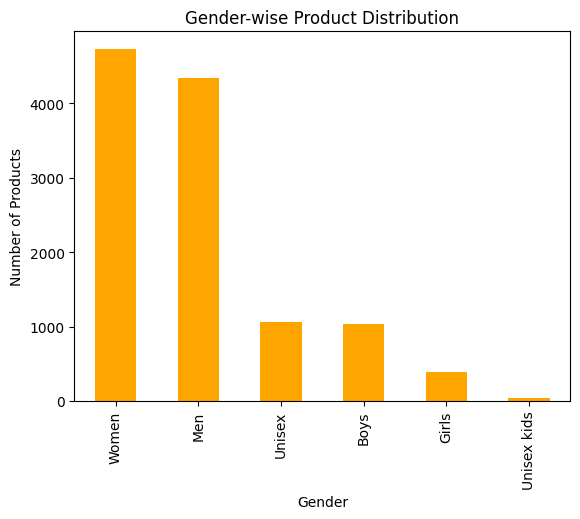

In [105]:
gender_counts = df['gender'].value_counts()

plt.figure()
gender_counts.plot(kind='bar', color = 'orange')
plt.title("Gender-wise Product Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Products")
plt.show()

Observations: Products for women dominate (~4,500), followed by men (~4,300). Among children, boys’ products are more prevalent than girls’, and unisex/kids’ products are the least represented.

Insights: The dataset shows a clear focus on women’s and men’s categories, with children’s and unisex products being niche segments.

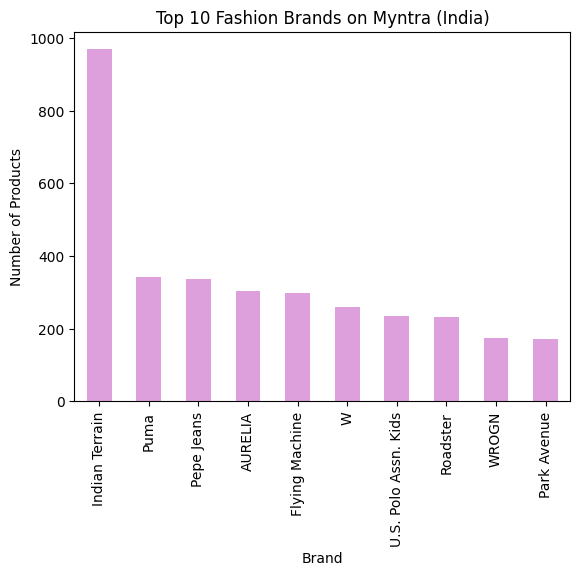

In [99]:
top_brands = df['brand'].value_counts().head(10)

plt.figure()
top_brands.plot(kind='bar', color = '#DDA0DD')
plt.title("Top 10 Fashion Brands on Myntra (India)")
plt.xlabel("Brand")
plt.ylabel("Number of Products")
plt.show()

Observations: Indian Terrain leads Myntra’s top 10 brands with ~970 products, followed by Puma and Pepe Jeans (~340 each). Brands like AURELIA, Flying Machine, and W have moderate presence, while WRONGN and Park Avenue have the fewest (~175).

Insights: Indian Terrain’s extensive catalog suggests broad market coverage, whereas brands with fewer listings likely focus on curated or niche offerings.

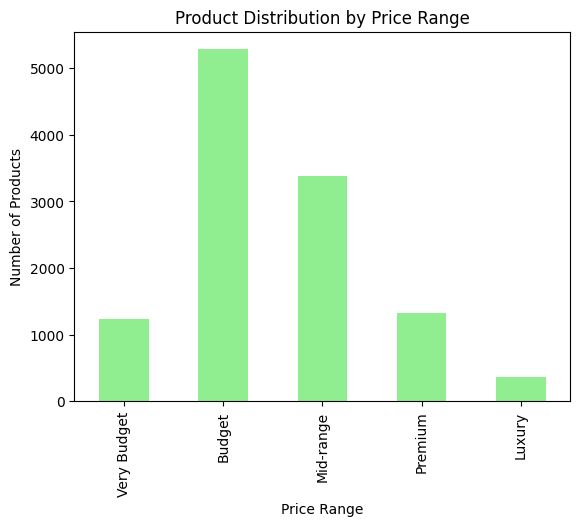

In [103]:
price_dist = df['price_range'].value_counts().sort_index()

plt.figure()
price_dist.plot(kind='bar', color = "#90EE90")
plt.title("Product Distribution by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Number of Products")
plt.show()

Observation: Most products fall in the “Budget” (≈5000 products) and “Mid-range” (≈3400 products) categories, with very few products in the “Luxury” category (~350).

Insight: The market is heavily skewed towards affordable products. Retailers targeting mid-to-low price segments will reach a larger audience. Luxury segment demand is niche and likely requires premium branding and marketing strategies.

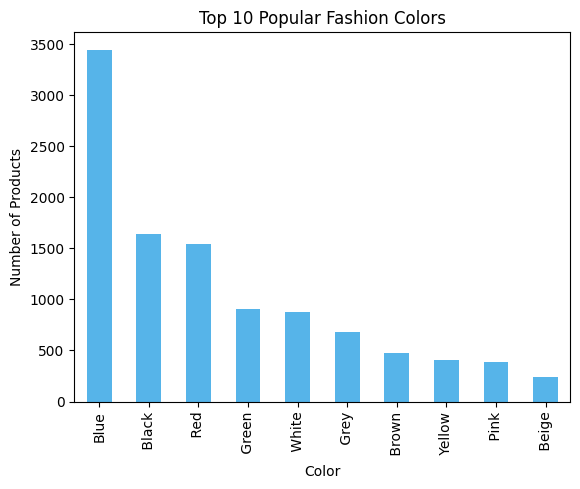

In [102]:
top_colors = df['primary_color'].value_counts().head(10)

plt.figure()
top_colors.plot(kind='bar', color = "#56B4E9")
plt.title("Top 10 Popular Fashion Colors")
plt.xlabel("Color")
plt.ylabel("Number of Products")
plt.show()

Observation: Blue dominates the color preference with ~3400 products, followed by Black and Red. Beige is the least common among the top 10.

Insight: Blue, Black, and Red are strong-selling colors and could be prioritized for inventory planning. Less popular colors like Beige, Pink, and Yellow may serve niche demands or seasonal collections.

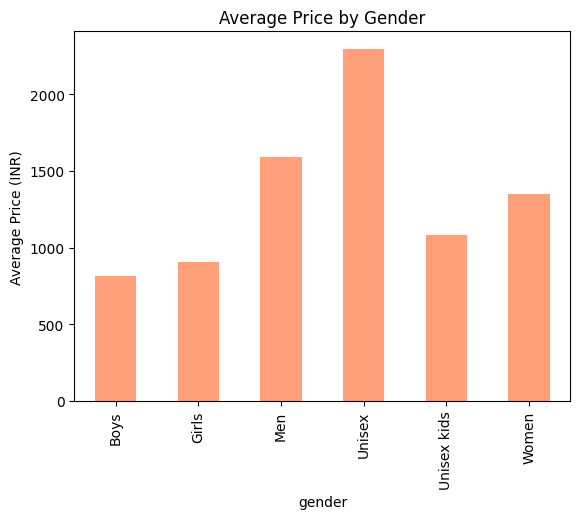

In [100]:
avg_price_gender = df.groupby('gender')['price'].mean()

avg_price_gender.plot(kind='bar', color='#FFA07A')
plt.title("Average Price by Gender")
plt.ylabel("Average Price (INR)")
plt.show()


Observation: Unisex products have the highest average price (~Rs. 2300), followed by Men (~Rs. 1600) and Women (~Rs. 1350). Kids’ products are cheapest (~Rs. 800).

Insight: Unisex items may include premium or multifunctional products, suggesting higher margins. Pricing strategy should consider gender-targeted preferences, with budget-friendly options for kids and women.

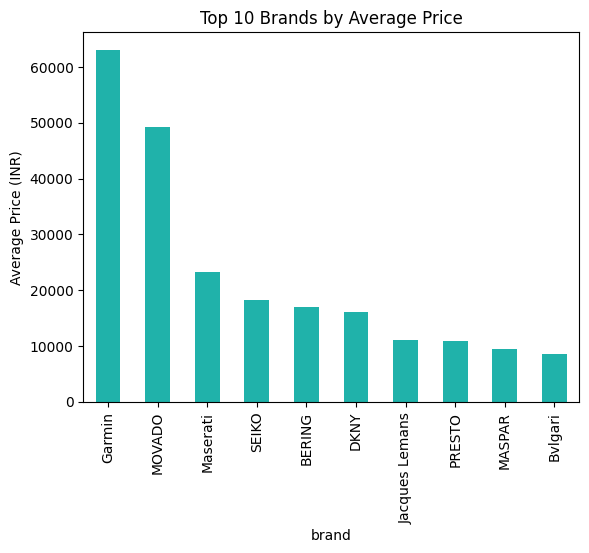

In [101]:
avg_price_brand = df.groupby('brand')['price'].mean().sort_values(ascending=False).head(10)

avg_price_brand.plot(kind='bar', color='#20B2AA')
plt.title("Top 10 Brands by Average Price")
plt.ylabel("Average Price (INR)")
plt.show()


Observation: Garmin and MOVADO are the most expensive brands (~Rs. 63k and Rs. 49k). Bvlgari and MASPAR are on the lower end (~Rs. 8k– Rs. 9.5k).

Insight: There’s a significant premium segment concentrated in top brands. Retailers should differentiate marketing for luxury brands versus mass-market brands, and pricing strategy should account for brand value perception.

DATA PREPARATION FOR BI

In [107]:
bi_df = df[
    [
        'brand',
        'gender',
        'primary_color',
        'price',
        'price_range'
    ]
]

In [108]:
bi_df = bi_df.rename(columns={
    'brand': 'Brand',
    'gender': 'Gender',
    'primary_color': 'Color',
    'price': 'Price',
    'price_range': 'Price Range'
})


In [109]:
bi_df = bi_df.sort_values(by='Price')

In [110]:
import os
os.makedirs("../output", exist_ok=True)

In [111]:
bi_df.to_csv("../output/cleaned_fashion_data.csv", index=False)